#  In-class Lab_Exercise (Decision Tree, Random Forest)

### 1.1 Data Set Information:( Mushroom Classification )

**Attribute Information**


1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### 1.2. Load the Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Read the csv file into a Panda Dataframe

### 1.3.Import the dataset(mushrooms.csv):

In [22]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day2\inclass\mushrooms.csv')

### 1.4 Get the top 5 rows and do some simple analysis on the dataset

In [23]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
cols = [i for i in df.select_dtypes(include=object)]
for i in cols:
    print(df[i].value_counts())
    print('---------')

e    4208
p    3916
Name: class, dtype: int64
---------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
---------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
---------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
---------
f    4748
t    3376
Name: bruises, dtype: int64
---------
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
---------
f    7914
a     210
Name: gill-attachment, dtype: int64
---------
c    6812
w    1312
Name: gill-spacing, dtype: int64
---------
b    5612
n    2512
Name: gill-size, dtype: int64
---------
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
---------
t    4608
e    3516
Name: stalk-shape, dtype: int64
---------
b    3776
?    2480
e    11

### 1.5. Use the function describe() to explain the dataframe

In [25]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 1.6 Check the distribution of the target class using countplot


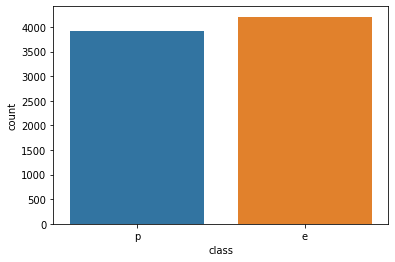

In [26]:
sns.countplot('class',data = df)

### 1.7 Apply LabelEncoder for target variable

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['class'] =le.fit_transform(df['class'])

In [33]:
df['class'].head()# we have inbuilt function for class , so plz use in brackets

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

### 1.8. Exploratory Data Analysis

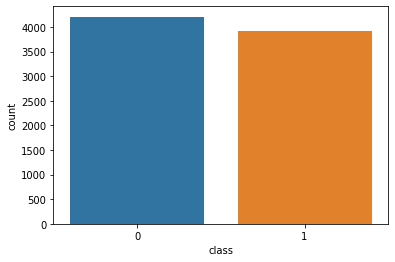

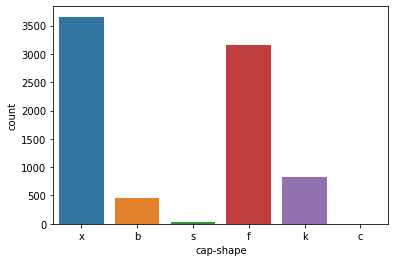

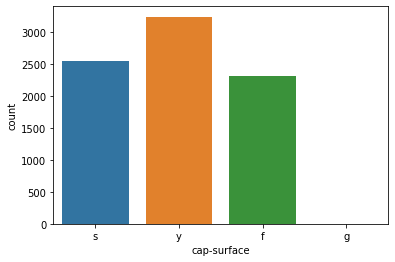

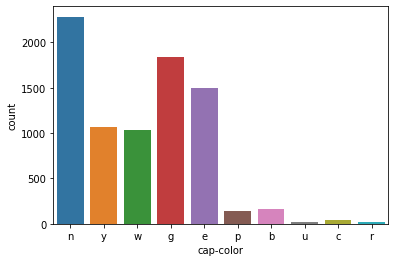

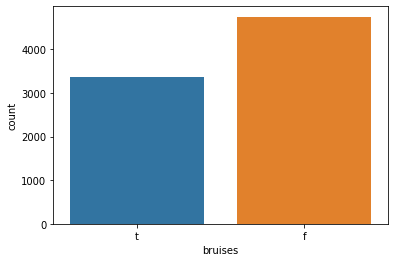

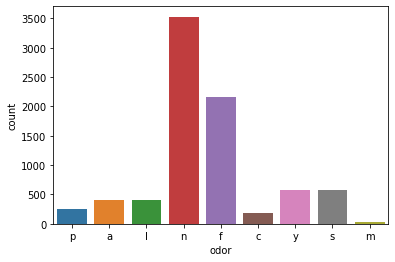

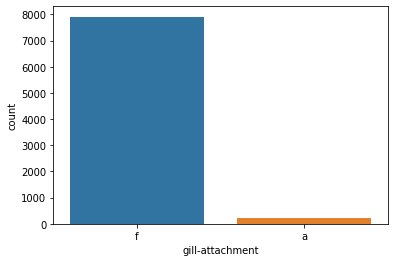

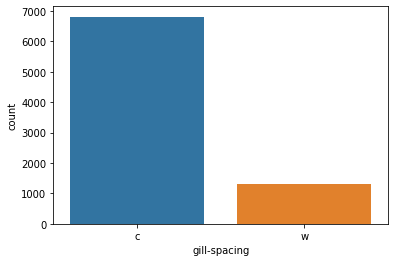

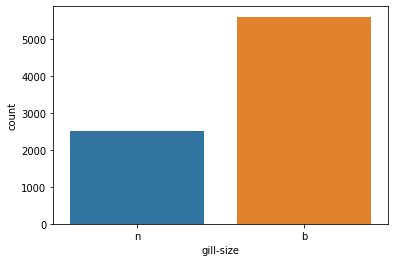

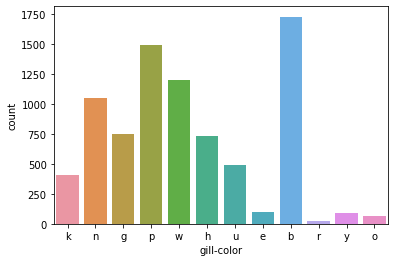

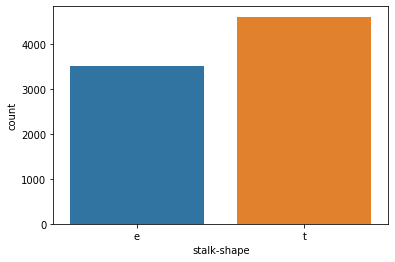

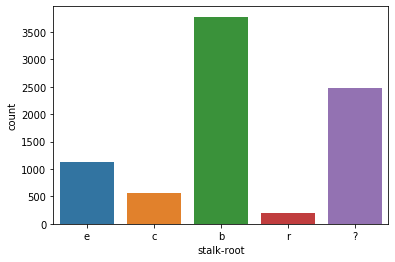

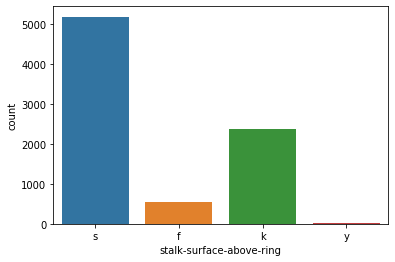

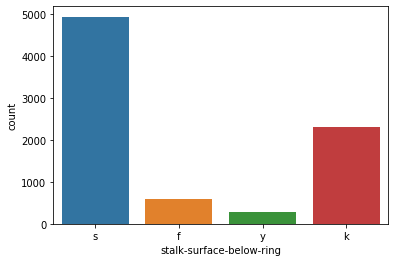

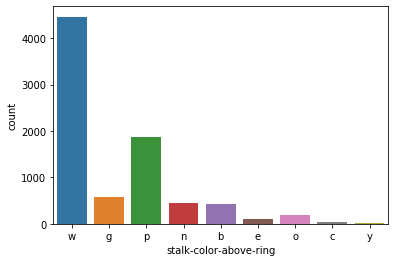

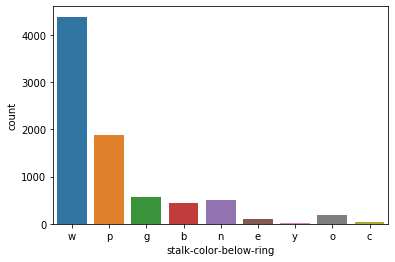

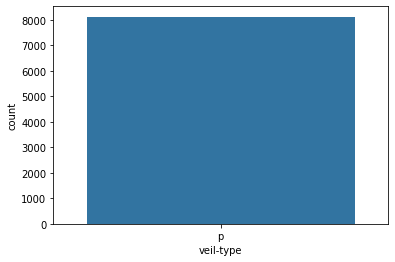

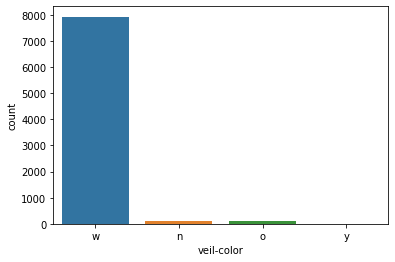

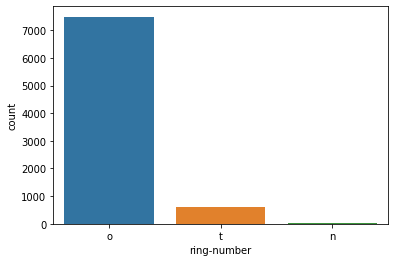

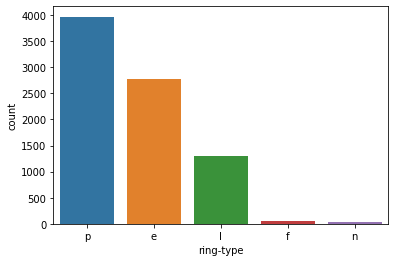

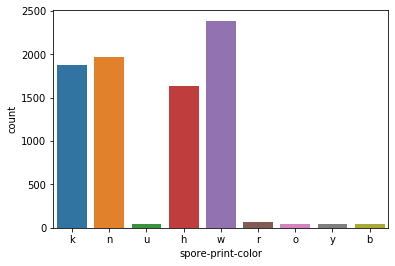

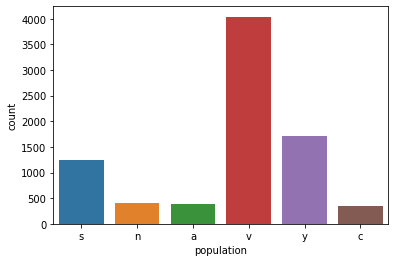

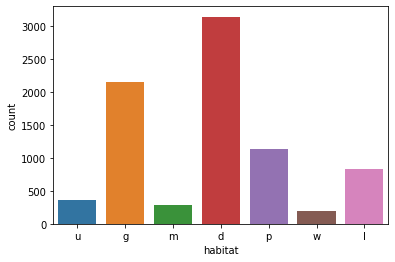

In [35]:
cols = [i for i in df.select_dtypes(include=object)]
for i in df.columns:
    sns.countplot(df[i])
    plt.show()

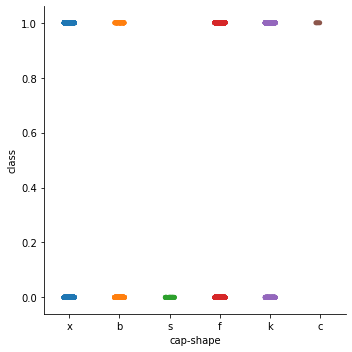

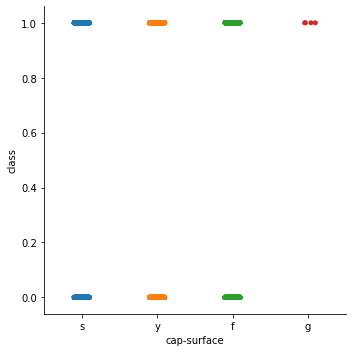

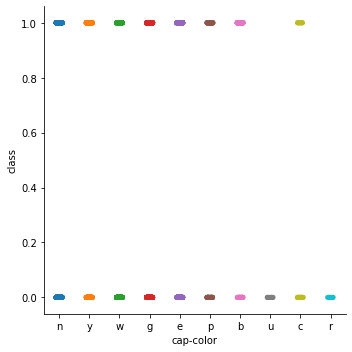

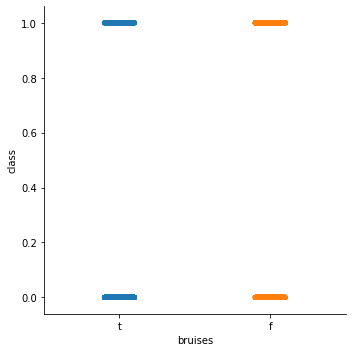

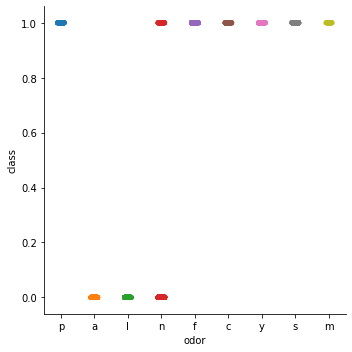

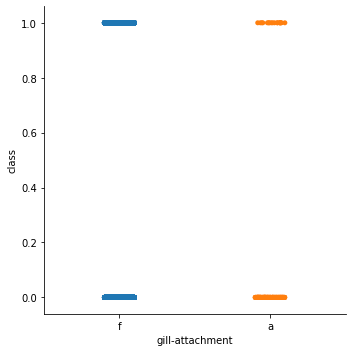

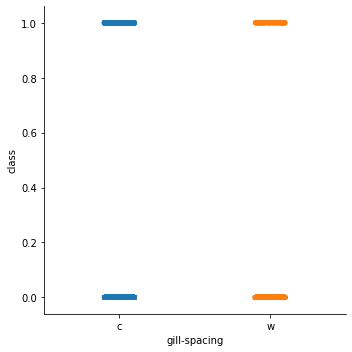

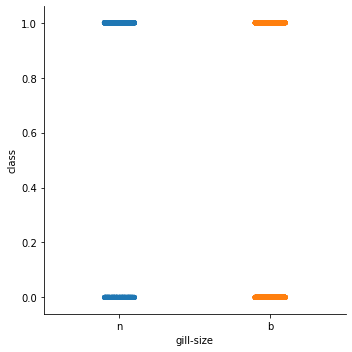

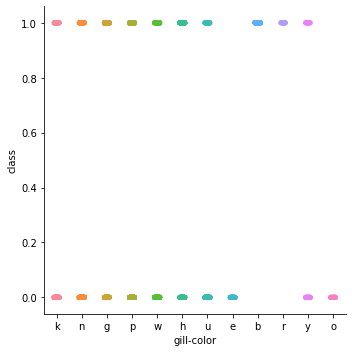

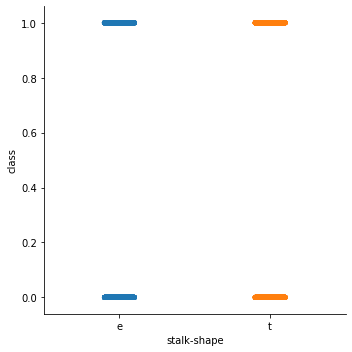

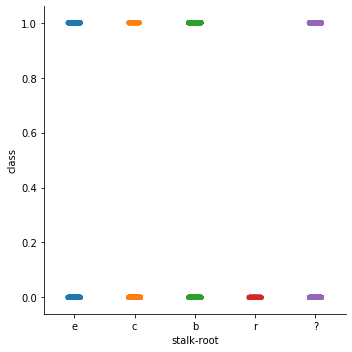

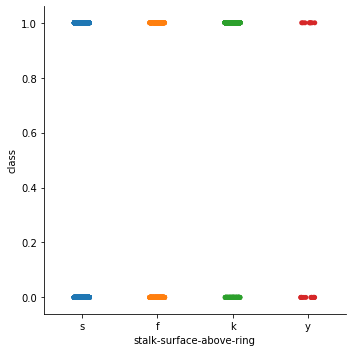

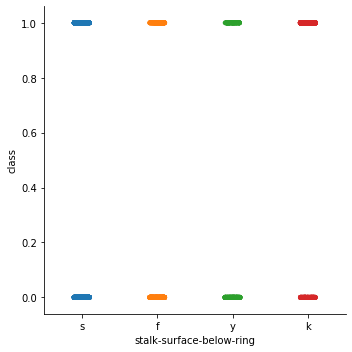

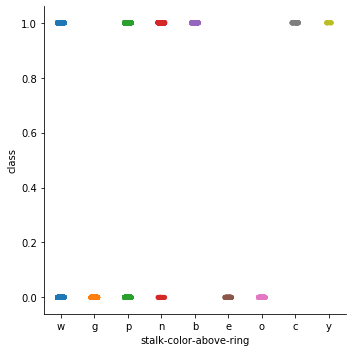

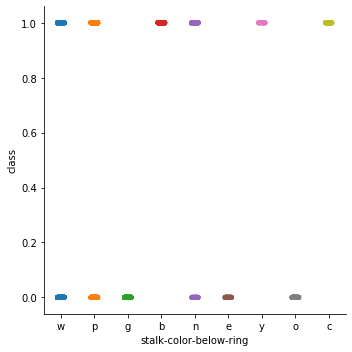

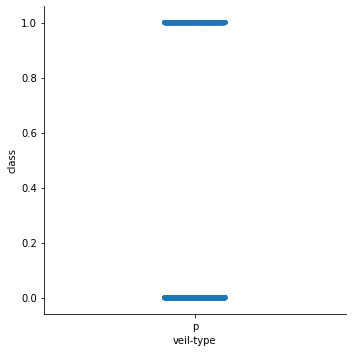

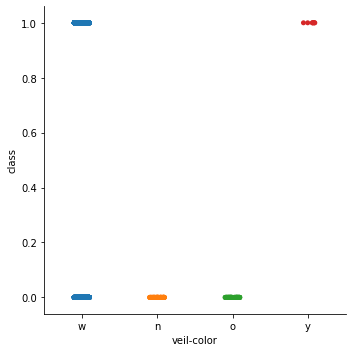

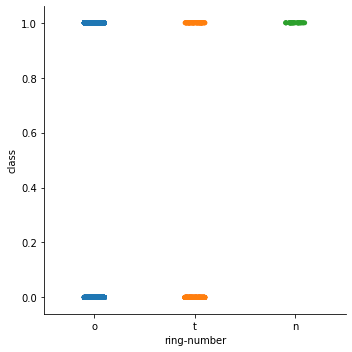

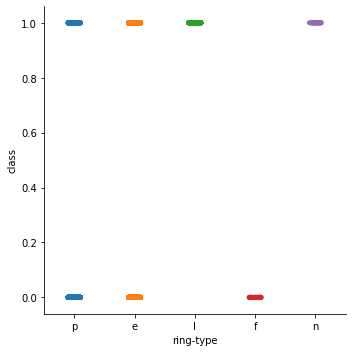

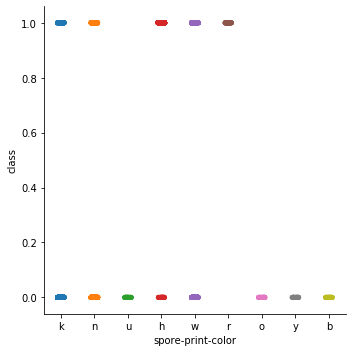

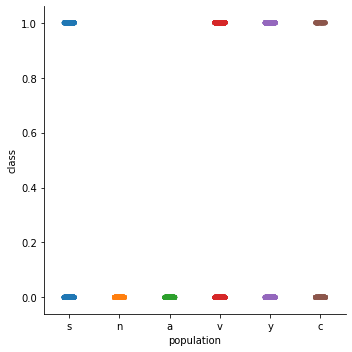

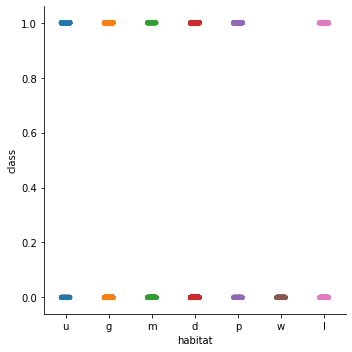

In [36]:
cols = [i for i in df.select_dtypes(include=object)]
for i in cols:
    sns.catplot(x= i, y="class", kind="strip", data=df)
    plt.show()

### 1.9 Create necessary plots

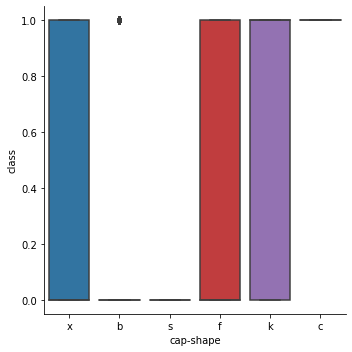

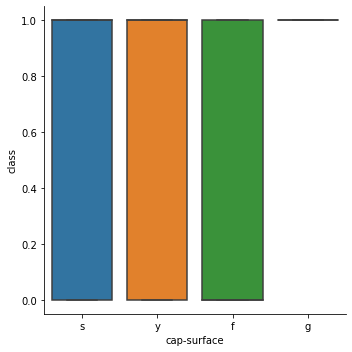

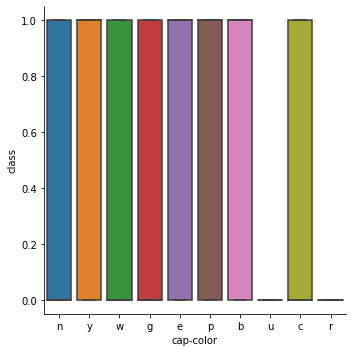

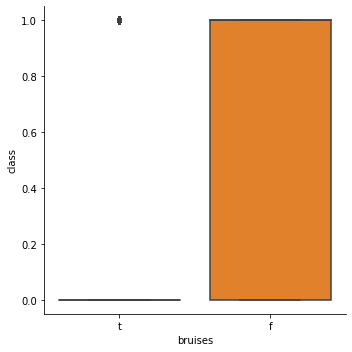

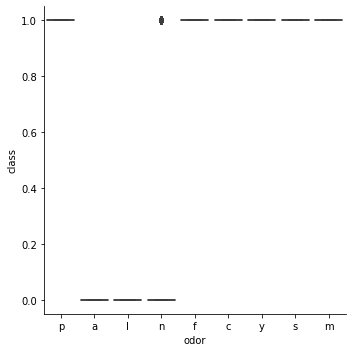

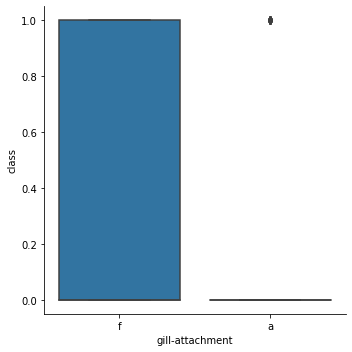

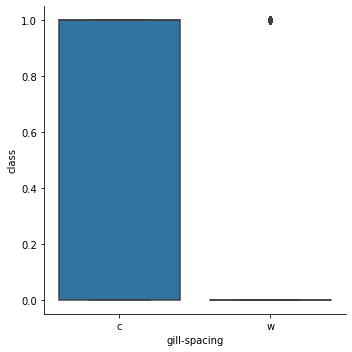

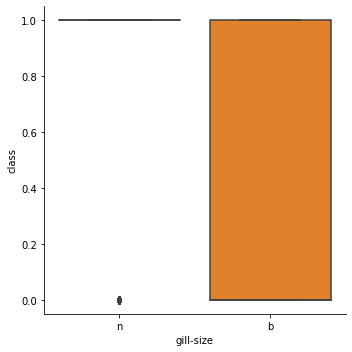

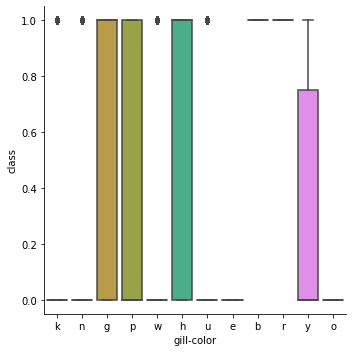

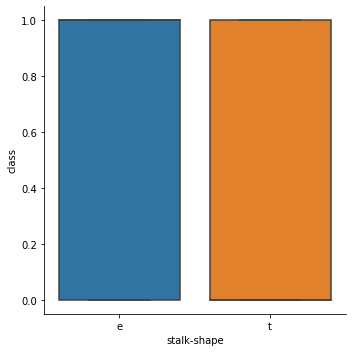

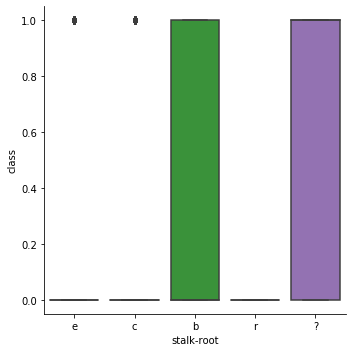

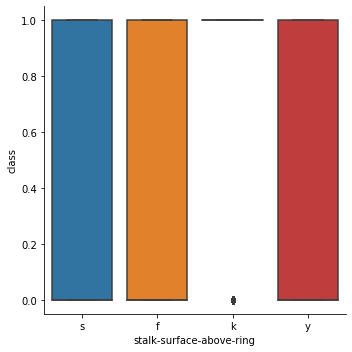

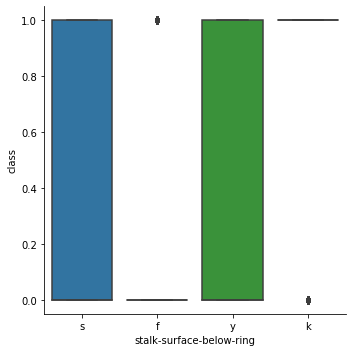

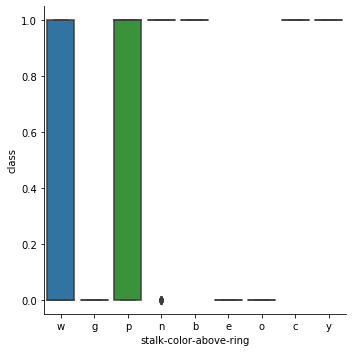

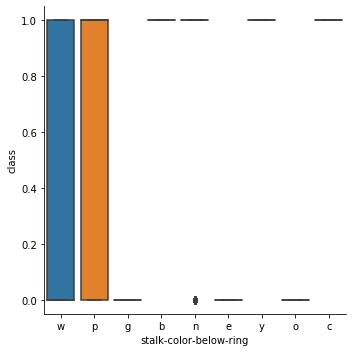

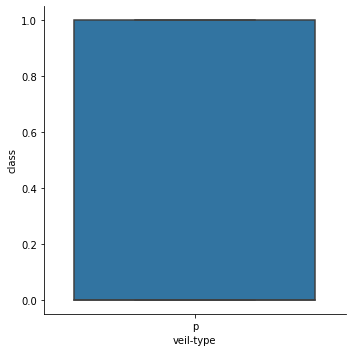

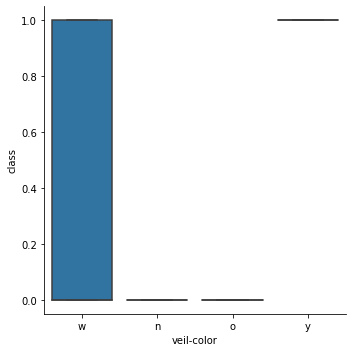

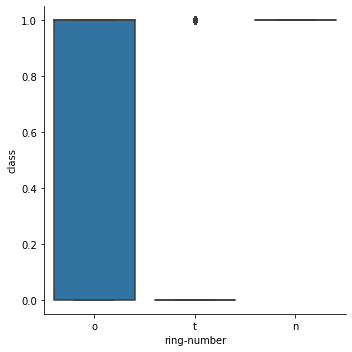

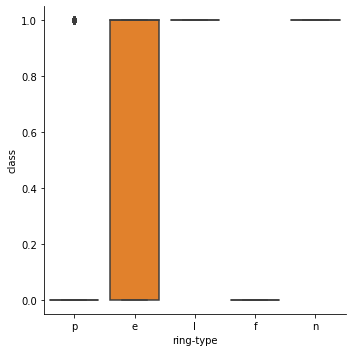

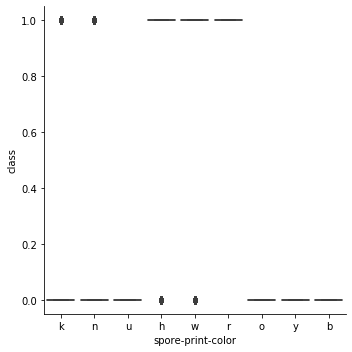

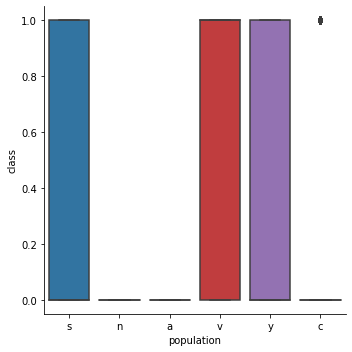

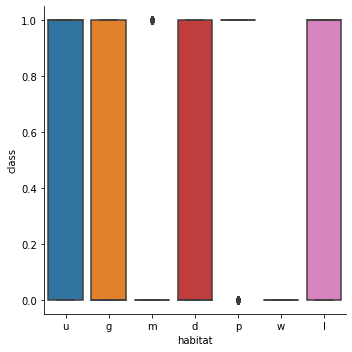

In [37]:
cols = [i for i in df.select_dtypes(include=object)]
for i in cols:
    sns.catplot(x= i, y="class", kind="box", data=df)
    plt.show()

### 1.10 What are all the variables present in the dataframe

In [38]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

###### 1.10 a) Create dummy variables for all the categorical variables.

In [39]:
y = df['class']
x = df.drop(columns ='class')

In [40]:
x.shape

(8124, 22)

In [41]:
x =pd.get_dummies(data =x,columns =x.columns)

In [42]:
x.shape

(8124, 117)

#### 1.10 b) Now again check for all the variables present in the dataframe

In [43]:
x.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

### 1.11 Extract the independent variables (X) and dependent variable (Y)

In [44]:
y = df['class']


### 1.12 Split the data into train and test set:(70/30)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

### 1.13. Implement Decision Tree & Random Forest

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt =DecisionTreeClassifier()
rf =RandomForestClassifier()

### 1.13 a)  Build a Decision tree classifier 

In [49]:
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 1.13 b)  Build Random Forest model**

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
y_train_prob = dt.predict_proba(X_train)[:,1]
y_train_pred = dt.predict(X_train)

print('Accuracy score on train ',accuracy_score(y_train,y_train_pred))
print('confusion matrix on train ')
print(confusion_matrix(y_train,y_train_pred))
print('AUC of Train ',roc_auc_score(y_train,y_train_prob))
y_test_prob = dt.predict_proba(X_test)[:,1]
y_test_pred = dt.predict(X_test)

print('Accuracy score on train ',accuracy_score(y_test,y_test_pred))
print('confusion matrix on train ')
print(confusion_matrix(y_test,y_test_pred))
print('AUC of Test ',roc_auc_score(y_test,y_test_prob))

Accuracy score on train  1.0
confusion matrix on train 
[[2843    0]
 [   0 2600]]
AUC of Train  1.0
Accuracy score on train  1.0
confusion matrix on train 
[[1365    0]
 [   0 1316]]
AUC of Test  1.0


In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
y_train_prob = rf.predict_proba(X_train)[:,1]
y_train_pred = rf.predict(X_train)

print('Accuracy score on train ',accuracy_score(y_train,y_train_pred))
print('confusion matrix on train ')
print(confusion_matrix(y_train,y_train_pred))
print('AUC of Train ',roc_auc_score(y_train,y_train_prob))
y_test_prob = rf.predict_proba(X_test)[:,1]
y_test_pred = rf.predict(X_test)

print('Accuracy score on train ',accuracy_score(y_test,y_test_pred))
print('confusion matrix on train ')
print(confusion_matrix(y_test,y_test_pred))
print('AUC of Test ',roc_auc_score(y_test,y_test_prob))

Accuracy score on train  1.0
confusion matrix on train 
[[2843    0]
 [   0 2600]]
AUC of Train  1.0
Accuracy score on train  1.0
confusion matrix on train 
[[1365    0]
 [   0 1316]]
AUC of Test  1.0


### 1. 14.Which one is the best Model for this dataset?
